# Split and Analyze 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = "/media/gjperin/64gb1/"
csv = pd.read_csv(DATA_PATH + "clf_90_5_5.csv")


In [16]:
def plot_data(data):    
    # Adaptado de https://github.com/marixko/MNRAS_nakazono_2021/blob/main/Nakazono_et_al_2021.ipynb

    blue = (0, 0.48, 0.70)
    orange = (230/255,159/255, 0)
    yellow = (0.64, 0.59, 0.15)
    pink = (0.8, 0.47, 0.65)
    black = (0,0,0)

    plt.rcParams.update({'font.size': 18})
    fig, ax = plt.subplots(1,3, figsize=(15,7))

    bins = np.arange(12,22.1,1)
    log = True
    density = False
    ax[0].hist(data[(data.target==0) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=pink, log=log, density=density, label="Train", zorder=3)
    ax[0].hist(data[(data.target==0) & (data.validation==1)].r_iso, bins=bins, color=pink, log=log, density=density, label="Validation", zorder=3)
    ax[0].hist(data[(data.target==0) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)

    ax[1].hist(data[(data.target==1) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=blue, log=log, density=density, label="Train", zorder=3)
    ax[1].hist(data[(data.target==1) & (data.validation==1)].r_iso, bins=bins, color=blue, log=log, density=density, label="Validation", zorder=3)
    ax[1].hist(data[(data.target==1) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)


    ax[2].hist(data[(data.target==2) & (data.train==1)].r_iso, histtype="step", linewidth=3, linestyle="dotted", bins=bins,
                color=yellow, log=log, density=density, label="Train", zorder=3)
    ax[2].hist(data[(data.target==2)& (data.validation==1)].r_iso, bins=bins, color=yellow, log=log, density=density, label="Validation", zorder=3)
    ax[2].hist(data[(data.target==2) & (data.test==1)].r_iso, histtype="step", linewidth=3, linestyle="dashed", bins=bins,
                color=black, log=log, density=density, label="Test", zorder=3)



    for j in [0,1,2]:
        if j == 0:
            title="QSO"
        elif j == 1:
            title="STAR"
        else:
            title ="GALAXY"
        
        ax[j].minorticks_on()
        ax[j].grid(zorder=0)
        ax[j].set_xticks(np.arange(12,22.1,2))
        ax[j].legend(loc="upper left", title=title, prop={'size': 15}, title_fontsize=18)
            
    plt.setp(ax, xlim=(12,22), ylim=(0.1,1000000) ,xlabel='r', ylabel = "Frequency")
    plt.tight_layout()

In [26]:
def summary(data):
    print(f"number of objects: {len(data)}")
    print(f"number of QSOs: {len(data[data.target==0])} ({len(data[data.target==0])/ len(data) * 100}%)")
    print(f"number of STARs: {len(data[data.target==1])} ({len(data[data.target==1])/ len(data) * 100}%)")
    print(f"number of GALs: {len(data[data.target==2])} ({len(data[data.target==2])/ len(data) * 100}%)")
    print()
    train = data[data.split == "train"]
    print(f"number of train objects: {len(train)}")
    print(f"number of train QSOs: {len(train[train.target==0])} ({len(train[train.target==0])/ len(train) * 100}%)")
    print(f"number of train STARs: {len(train[train.target==1])} ({len(train[train.target==1])/ len(train) * 100}%)")
    print(f"number of train GALs: {len(train[train.target==2])} ({len(train[train.target==2])/ len(train) * 100}%)")
    print()
    val = data[data.split == "val"]
    print(f"number of train objects: {len(val)}")
    print(f"number of val QSOs: {len(val[val.target==0])} ({len(val[val.target==0])/ len(val) * 100}%)")
    print(f"number of val STARs: {len(val[val.target==1])} ({len(val[val.target==1])/ len(val) * 100}%)")
    print(f"number of val GALs: {len(val[val.target==2])} ({len(val[val.target==2])/ len(val) * 100}%)")
    print()
    test = data[data.split == "test"]
    print(f"number of train objects: {len(test)}")
    print(f"number of test QSOs: {len(test[test.target==0])} ({len(test[test.target==0])/ len(test) * 100}%)")
    print(f"number of test STARs: {len(test[test.target==1])} ({len(test[test.target==1])/ len(test) * 100}%)")
    print(f"number of test GALs: {len(test[test.target==2])} ({len(test[test.target==2])/ len(test) * 100}%)")
    print()
    plot_data(data)

In [49]:
df1 = csv[csv.split=="train"]
df1 = df1.reset_index()
df1 = df1.rename(columns={"index":"inside_split_order"})
df1['inside_split_order'] = df1.index

df2 = csv[csv.split=="val"]
df2 = df2.reset_index()
df2 = df2.rename(columns={"index":"inside_split_order"})
df2['inside_split_order'] = df2.index

df3 = csv[csv.split=="test"]
df3 = df3.reset_index()
df3 = df3.rename(columns={"index":"inside_split_order"})
df3['inside_split_order'] = df3.index


csv_new = pd.concat((df1, df3, df2))

In [54]:
csv_new.to_csv("all/clf_90_5_5.csv")

In [56]:
nowise = csv_new[csv_new['w1mpro'].isna()]
dist1 = csv_new.dropna().sort_values("r_iso").iloc[0:27465]
dist2 = csv_new.dropna().sort_values("r_iso").iloc[27465:54930]
dist3 = csv_new.dropna().sort_values("r_iso").iloc[54930:82395]
dist4 = csv_new.dropna().sort_values("r_iso").iloc[82395:]

number of objects: 23267
number of QSOs: 5783 (24.854944771564877%)
number of STARs: 12020 (51.661150986375546%)
number of GALs: 5464 (23.48390424205957%)

number of train objects: 20916
number of train QSOs: 5204 (24.88047427806464%)
number of train STARs: 10795 (51.61120673168866%)
number of train GALs: 4917 (23.5083189902467%)

number of train objects: 1155
number of val QSOs: 276 (23.896103896103895%)
number of val STARs: 602 (52.121212121212125%)
number of val GALs: 277 (23.982683982683984%)

number of train objects: 1196
number of test QSOs: 303 (25.334448160535118%)
number of test STARs: 623 (52.090301003344486%)
number of test GALs: 270 (22.5752508361204%)



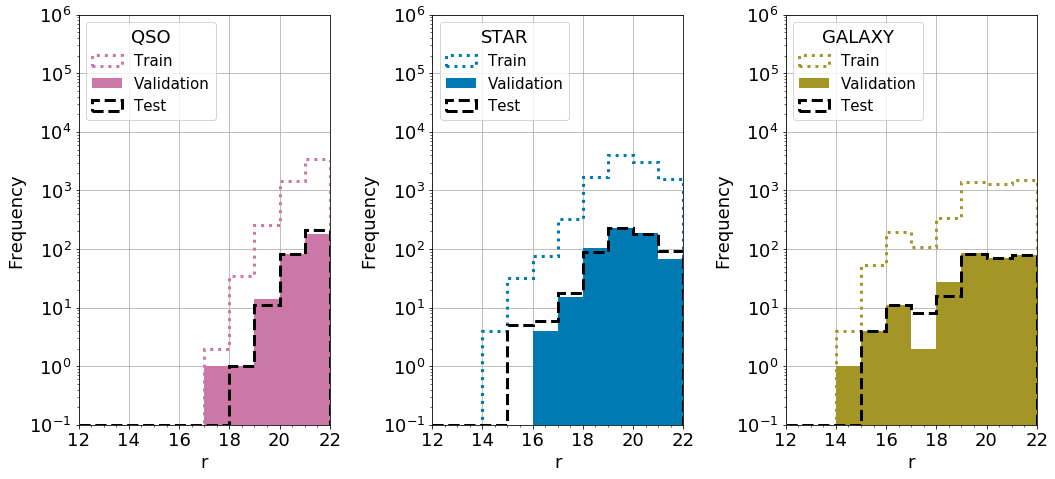

In [57]:
summary(nowise)

number of objects: 27465
number of QSOs: 85 (0.3094847988348808%)
number of STARs: 20151 (73.36974330966684%)
number of GALs: 7229 (26.320771891498268%)

number of train objects: 24815
number of train QSOs: 78 (0.3143260124924441%)
number of train STARs: 18174 (73.23796091073947%)
number of train GALs: 6563 (26.447713076768082%)

number of train objects: 1355
number of val QSOs: 4 (0.2952029520295203%)
number of val STARs: 1015 (74.90774907749078%)
number of val GALs: 336 (24.797047970479706%)

number of train objects: 1295
number of test QSOs: 3 (0.23166023166023164%)
number of test STARs: 962 (74.28571428571429%)
number of test GALs: 330 (25.482625482625483%)



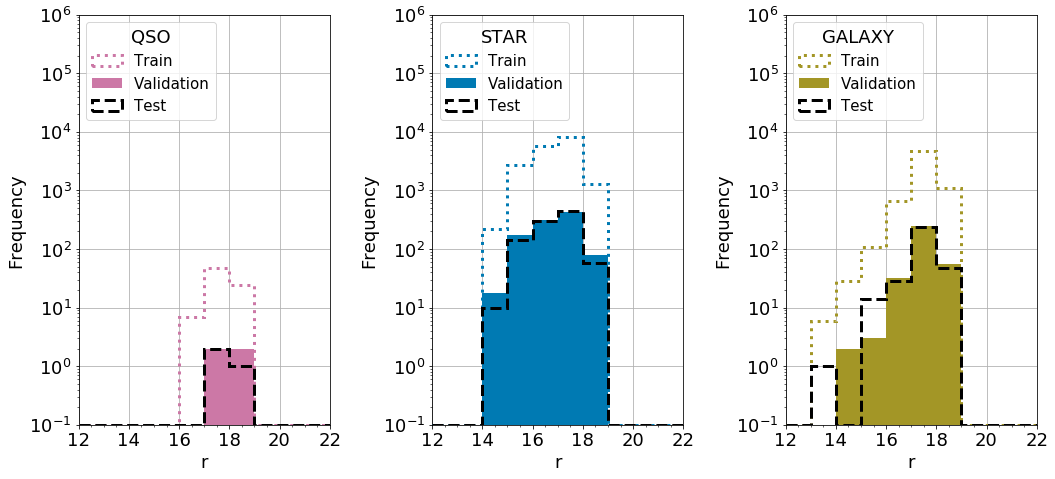

In [28]:
summary(dist1)

number of objects: 27465
number of QSOs: 880 (3.2040779173493537%)
number of STARs: 12141 (44.205352266521025%)
number of GALs: 14444 (52.590569816129616%)

number of train objects: 24669
number of train QSOs: 790 (3.2023997729944464%)
number of train STARs: 10931 (44.31067331468645%)
number of train GALs: 12948 (52.486926912319106%)

number of train objects: 1372
number of val QSOs: 44 (3.206997084548105%)
number of val STARs: 595 (43.36734693877551%)
number of val GALs: 733 (53.42565597667639%)

number of train objects: 1424
number of test QSOs: 46 (3.2303370786516856%)
number of test STARs: 615 (43.18820224719101%)
number of test GALs: 763 (53.5814606741573%)



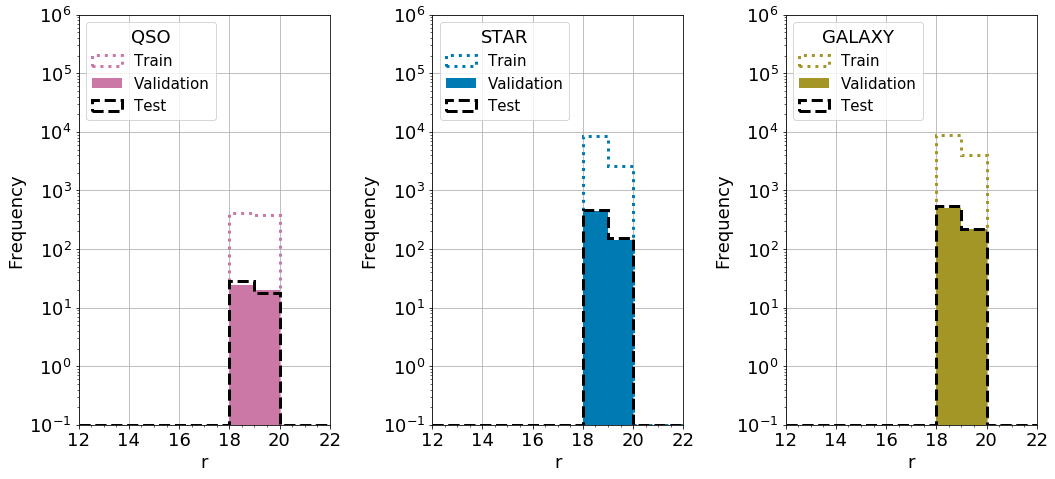

In [29]:
summary(dist2)

number of objects: 27465
number of QSOs: 3962 (14.425632623338794%)
number of STARs: 7655 (27.871836883306027%)
number of GALs: 15848 (57.70253049335518%)

number of train objects: 24772
number of train QSOs: 3598 (14.524463103503956%)
number of train STARs: 6891 (27.817697400290655%)
number of train GALs: 14283 (57.6578394962054%)

number of train objects: 1348
number of val QSOs: 189 (14.020771513353116%)
number of val STARs: 377 (27.967359050445108%)
number of val GALs: 782 (58.01186943620178%)

number of train objects: 1345
number of test QSOs: 175 (13.011152416356877%)
number of test STARs: 387 (28.7732342007435%)
number of test GALs: 783 (58.21561338289963%)



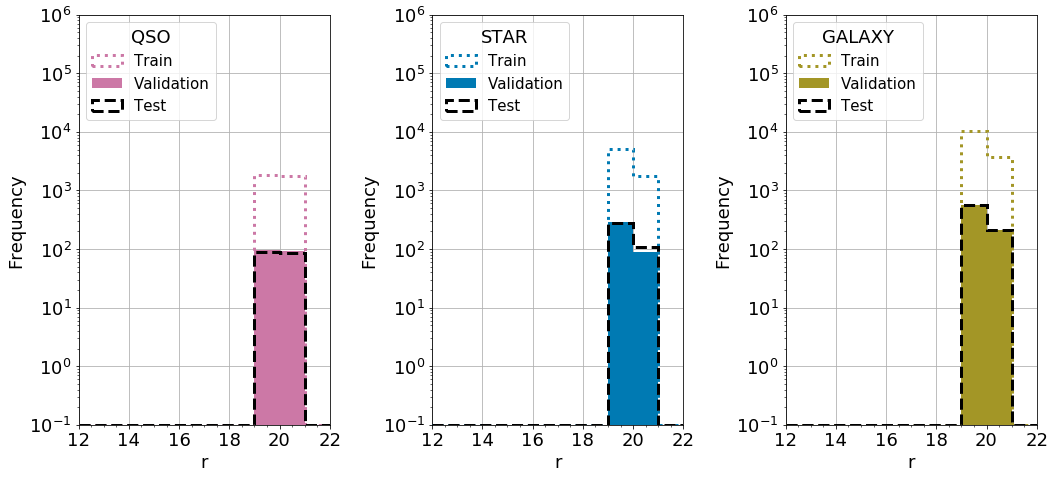

In [30]:
summary(dist3)

number of objects: 27466
number of QSOs: 7355 (26.778562586470546%)
number of STARs: 2481 (9.032986237530038%)
number of GALs: 17630 (64.18845117599942%)

number of train objects: 24650
number of train QSOs: 6592 (26.742393509127787%)
number of train STARs: 2213 (8.977687626774848%)
number of train GALs: 15845 (64.27991886409737%)

number of train objects: 1423
number of val QSOs: 390 (27.406886858749125%)
number of val STARs: 133 (9.346451159522136%)
number of val GALs: 900 (63.24666198172875%)

number of train objects: 1393
number of test QSOs: 373 (26.776740847092604%)
number of test STARs: 135 (9.691313711414214%)
number of test GALs: 885 (63.53194544149318%)



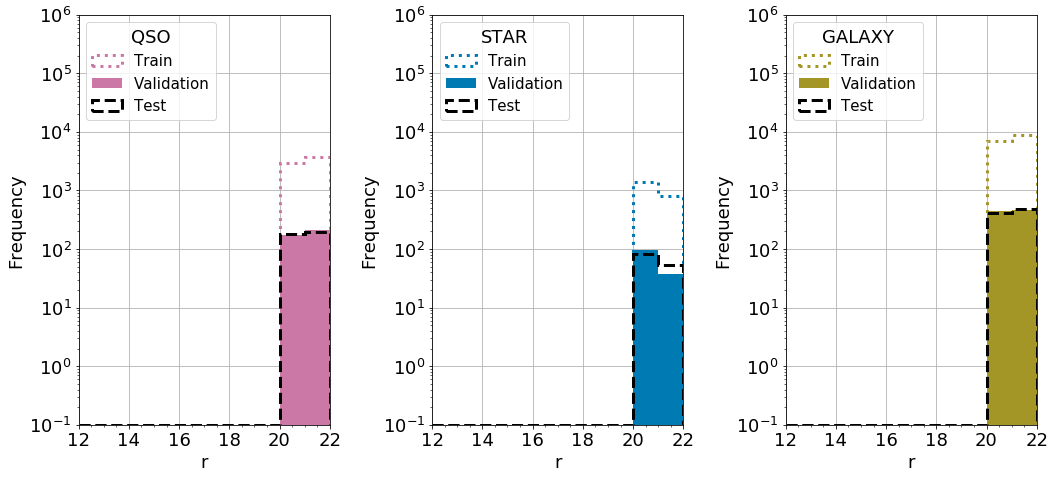

In [31]:
summary(dist4)

number of objects: 133128
number of QSOs: 18065 (13.569647256775433%)
number of STARs: 54448 (40.89898443603149%)
number of GALs: 60615 (45.53136830719308%)

number of train objects: 119822
number of train QSOs: 16262 (13.571798167281468%)
number of train STARs: 49004 (40.89733104104422%)
number of train GALs: 54556 (45.53087079167432%)

number of train objects: 6653
number of val QSOs: 903 (13.572824289794077%)
number of val STARs: 2722 (40.91387344055313%)
number of val GALs: 3028 (45.51330226965279%)

number of train objects: 6653
number of test QSOs: 900 (13.527731850293101%)
number of test STARs: 2722 (40.91387344055313%)
number of test GALs: 3031 (45.55839470915377%)



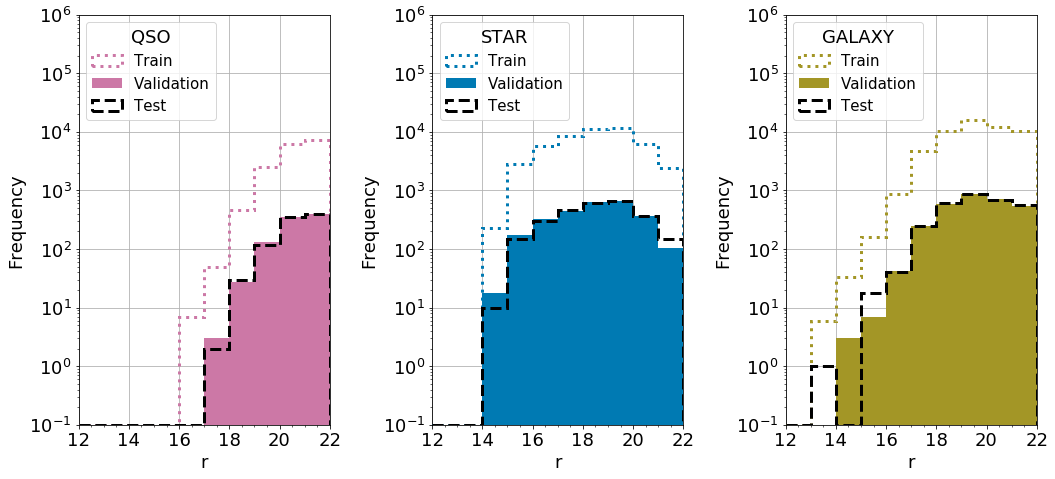

In [55]:
summary(csv_new)